# Time Series Fundamentals with Tensorflow


* Dataset Link -> https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

## Explaination

> The `BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv` file has roughly ~8yrs of bitcoin prices, calculated on a daily basis which amounts to `2787` samples.

> Typically a machine learning models requires `lots and lots of samples`.

> In `time series problems`, we will be often coming across datasets which do not have `sufficient or smaller number of samples`.

### Seasonality

> The frequency at which a time series value is collected is often referred to as `seasonality`. This is usually mesaured in number of samples per year. For example, collecting the price of Bitcoin once per day would result in a time series with a `seasonality of 365`. Time series data collected with different seasonality values often exhibit seasonal patterns (`e.g.` electricity demand behing higher in Summer months for air conditioning than Winter months)

## Getting the data

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-09-05 12:32:48--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2022-09-05 12:32:49 (5.91 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [2]:
import pandas as pd

In [43]:
bitcoin_df= pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', parse_dates=["Date"], index_col=["Date"])
bitcoin_df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


## Getting the Data

Link -> https://finance.yahoo.com/quote/BTC-USD/

In [44]:
!wget https://media.githubusercontent.com/media/arghanath007/MachineLearning/main/Time%20Series/BTC-USD.csv

--2022-09-05 13:30:12--  https://media.githubusercontent.com/media/arghanath007/MachineLearning/main/Time%20Series/BTC-USD.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 236367 (231K) [text/plain]
Saving to: ‘BTC-USD.csv.2’

BTC-USD.csv.2       100%[===================>] 230.83K  --.-KB/s    in 0.03s   

2022-09-05 13:30:12 (6.96 MB/s) - ‘BTC-USD.csv.2’ saved [236367/236367]



In [78]:
bitcoin_df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [59]:
bitcoin_updated_df= pd.read_csv('/content/BTC-USD.csv', parse_dates=["Date"], index_col=["Date"])
bitcoin_updated_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-10-17,382.756012,385.477997,375.389008,383.757996,383.757996,13600700
2014-10-18,383.976013,395.157990,378.971008,391.441986,391.441986,11416800
2014-10-19,391.253998,393.938995,386.457001,389.545990,389.545990,5914570
2014-10-20,389.230988,390.084015,378.252014,382.845001,382.845001,16419000
2014-10-21,382.420990,392.645996,380.834015,386.475006,386.475006,14188900
...,...,...,...,...,...,...
2022-09-01,20050.498047,20198.390625,19653.968750,20127.140625,20127.140625,30182031010
2022-09-02,20126.072266,20401.568359,19814.765625,19969.771484,19969.771484,29123998928
2022-09-03,19969.718750,20037.009766,19698.355469,19832.087891,19832.087891,23613051457


In [60]:
len(bitcoin_updated_df)

2881

In [61]:
len(bitcoin_df)

2787

In [62]:
bitcoin_updated_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-01,20050.498047,20198.390625,19653.968750,20127.140625,20127.140625,30182031010
2022-09-02,20126.072266,20401.568359,19814.765625,19969.771484,19969.771484,29123998928
2022-09-03,19969.718750,20037.009766,19698.355469,19832.087891,19832.087891,23613051457
2022-09-04,19832.470703,19999.689453,19636.816406,19986.712891,19986.712891,25245861652
2022-09-05,20027.300781,20027.300781,19674.099609,19728.171875,19728.171875,27602620416


In [63]:
bitcoin_df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


## DataFrame `Info`

In [64]:
bitcoin_updated_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2881 entries, 2014-10-17 to 2022-09-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2881 non-null   float64
 1   High       2881 non-null   float64
 2   Low        2881 non-null   float64
 3   Close      2881 non-null   float64
 4   Adj Close  2881 non-null   float64
 5   Volume     2881 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 157.6 KB


In [79]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [65]:
bitcoin_updated_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2.881000e+03
mean,12760.639947,13090.281559,12392.254797,12765.714959,12765.714959,1.588919e+10
std,16507.337512,16932.420444,16015.174849,16502.554117,16502.554117,1.987690e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,665.914978,681.554993,654.786011,666.523010,666.523010,9.913510e+07
50%,6755.140137,6907.959961,6617.166992,6769.939941,6769.939941,6.531940e+09
75%,13031.201172,13651.516602,12747.700195,13075.248047,13075.248047,2.724657e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [66]:
len(bitcoin_df) / 365

7.635616438356164

## Visualizing the dataset

In [71]:
bitcoin_prices= pd.DataFrame(bitcoin_updated_df['Close']).rename(columns={"Close": "Price"})
bitcoin_prices

,Price
Date,
2014-10-17,383.757996
2014-10-18,391.441986
2014-10-19,389.545990
2014-10-20,382.845001
2014-10-21,386.475006
...,...
2022-09-01,20127.140625
2022-09-02,19969.771484
2022-09-03,19832.087891


In [68]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Price of Bitcon')

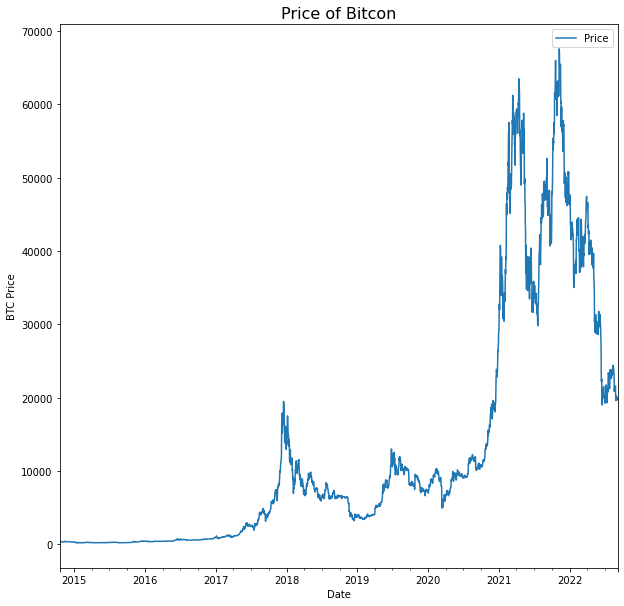

In [72]:
bitcoin_prices.plot(figsize=(10,10))
plt.ylabel("BTC Price")
plt.title("Price of Bitcon", fontsize=16)

In [73]:
bitcoin_df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [74]:
bitcoin_updated_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-10-17,382.756012,385.477997,375.389008,383.757996,383.757996,13600700
2014-10-18,383.976013,395.157990,378.971008,391.441986,391.441986,11416800
2014-10-19,391.253998,393.938995,386.457001,389.545990,389.545990,5914570
2014-10-20,389.230988,390.084015,378.252014,382.845001,382.845001,16419000
2014-10-21,382.420990,392.645996,380.834015,386.475006,386.475006,14188900


## Importing the `bitcon prices csv file using python`

Link -> https://realpython.com/python-csv/

In [80]:
import csv
from datetime import datetime

timesteps=[]
btc_price=[]

with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader)
  for line in csv_reader:
      timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
      btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

In [83]:
import csv
from datetime import datetime

timesteps=[]
btc_price=[]

with open('/content/BTC-USD.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader)
  for line in csv_reader:
      timesteps.append(datetime.strptime(line[0], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
      btc_price.append(float(line[4])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2014, 10, 17, 0, 0),
  datetime.datetime(2014, 10, 18, 0, 0),
  datetime.datetime(2014, 10, 19, 0, 0),
  datetime.datetime(2014, 10, 20, 0, 0),
  datetime.datetime(2014, 10, 21, 0, 0),
  datetime.datetime(2014, 10, 22, 0, 0),
  datetime.datetime(2014, 10, 23, 0, 0),
  datetime.datetime(2014, 10, 24, 0, 0),
  datetime.datetime(2014, 10, 25, 0, 0),
  datetime.datetime(2014, 10, 26, 0, 0)],
 [383.757996,
  391.441986,
  389.54599,
  382.845001,
  386.475006,
  383.15799,
  358.416992,
  358.345001,
  347.270996,
  354.70401])

## Visualizing the dataset

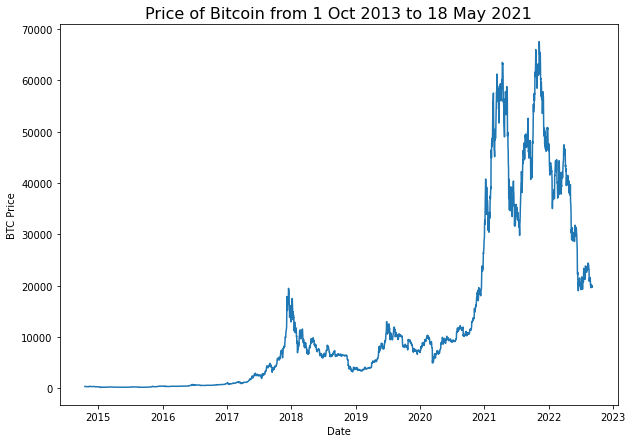

In [84]:
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

## `Type 1`: Creating the train and test datasets from the time series dataset

In [87]:
bitcoin_prices[:5]

,Price
Date,
2014-10-17,383.757996
2014-10-18,391.441986
2014-10-19,389.545990
2014-10-20,382.845001
2014-10-21,386.475006


### Creating the datasets the `wrong way`

In [86]:
from sklearn.model_selection import train_test_split

In [88]:
timesteps= bitcoin_prices.index.to_numpy()
prices= bitcoin_prices['Price'].to_numpy()

timesteps[:5], prices[:5]

(array(['2014-10-17T00:00:00.000000000', '2014-10-18T00:00:00.000000000',
        '2014-10-19T00:00:00.000000000', '2014-10-20T00:00:00.000000000',
        '2014-10-21T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([383.757996, 391.441986, 389.54599 , 382.845001, 386.475006]))

In [90]:
X_train, X_test, y_train, y_test= train_test_split(timesteps, prices, test_size=0.2, random_state=22)

len(X_train), len(X_test), X_train.shape, X_test.shape

(2304, 577, (2304,), (577,))

## Let's plot wrong train and test splits

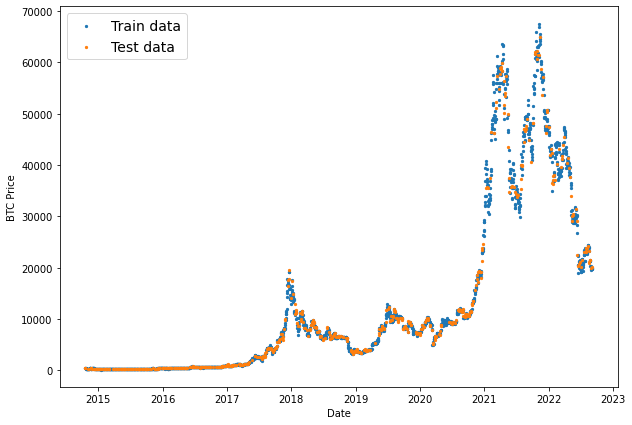

In [91]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

### Creating the datasets the `right way`

In [92]:
split_sizes= int(0.8 * len(prices))

X_train, y_train= timesteps[:split_sizes], prices[:split_sizes]

X_test, y_test= timesteps[split_sizes: ], prices[split_sizes: ]

len(X_train), len(X_test), len(X_train), len(X_test)

(2304, 577, 2304, 577)

## Let's plot `right` train and test splits

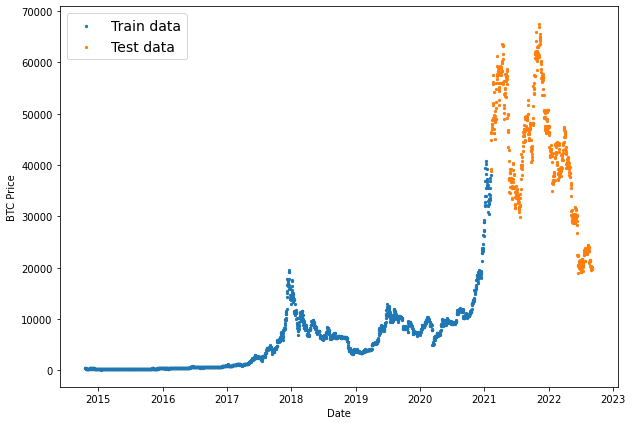

In [93]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

##Create a plotting function

> Plotting function to plot the datasets 


In [94]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, ylabel,format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  ylabel: The ylabel of the plot, string type.
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel(ylabel)
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

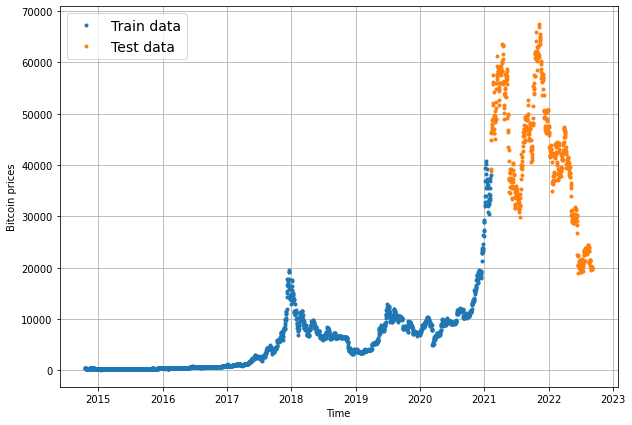

In [96]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data", ylabel="Bitcoin prices")
plot_time_series(timesteps=X_test, values=y_test, label="Test data", ylabel="Bitcoin prices")

## Modelling Experiments

> Before we discuss what modelling experiments we're going to run, there are two terms you should be familiar with, horizon and window.

* **Horizon** = `number of timesteps to predict into future`
* **Window size**= `number of timesteps from past used to predict horizon`

> For example, if we wanted to predict the price of Bitcoin for tomorrow (1 day in the future) using the previous week's worth of Bitcoin prices (7 days in the past), the horizon would be 1 and the window would be 7.

### Experiment List: 

| Model Number | Model Type | Horizon size | Window size | Extra data |
| ----- | ----- | ----- | ----- | ----- |
| 0 | Naïve model (baseline) | NA | NA | NA |
| 1 | Dense model | 1 | 7 | NA |
| 2 | Same as 1 | 1 | 30 | NA | 
| 3 | Same as 1 | 7 | 30 | NA |
| 4 | Conv1D | 1 | 7 | NA |
| 5 | LSTM | 1 | 7 | NA |
| 6 | Same as 1 (but with multivariate data) | 1 | 7 | Block reward size |
| 7 | [N-BEATs Algorithm](https://arxiv.org/pdf/1905.10437.pdf) | 1 | 7 | NA |
| 8 | Ensemble (multiple models optimized on different loss functions) | 1 | 7 | NA | 
| 9 | Future prediction model (model to predict future values) | 1 | 7 | NA| 
| 10 | Same as 1 (but with turkey 🦃 data introduced) | 1 | 7 | NA |


>To reiterate, as you can see, we can build many types of models for the data we're working with. But that doesn't mean that they'll perform well. Deep learning is a powerful technique but it doesn't always work. And as always, start with a simple model first and then add complexity as needed.



## `Model 0: Naive Forecasting(baseline)

* Docs -> https://otexts.com/fpp2/simple-methods.html

In [97]:
y_test[:5]

array([39266.011719, 38903.441406, 46196.464844, 46481.105469,
       44918.183594])

### Creating a Naive forecast

In [98]:
naive_forecast= y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([39266.011719, 38903.441406, 46196.464844, 46481.105469,
        44918.183594, 47909.332031, 47504.851563, 47105.515625,
        48717.289063, 47945.058594]),
 array([20260.019531, 20041.738281, 19616.814453, 20297.994141,
        19796.808594, 20049.763672, 20127.140625, 19969.771484,
        19832.087891, 19986.712891]))

In [99]:
y_test[-10:]

array([20041.738281, 19616.814453, 20297.994141, 19796.808594,
       20049.763672, 20127.140625, 19969.771484, 19832.087891,
       19986.712891, 19728.171875])

### Plotting the Naive forecast

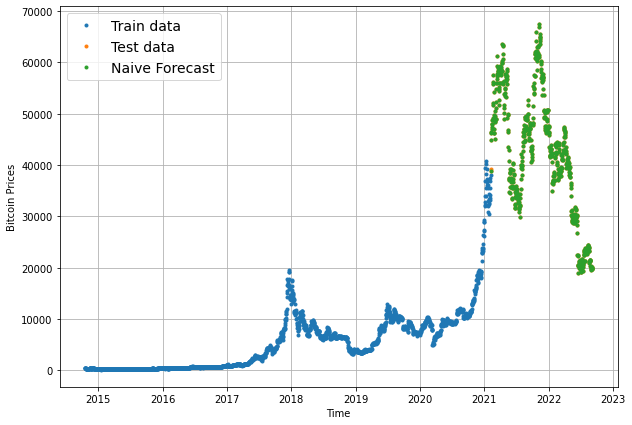

In [102]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data", ylabel="Bitcoin Prices")
plot_time_series(timesteps=X_test, values=y_test, label="Test data", ylabel="Bitcoin Prices")
plot_time_series(timesteps=X_test[1:], values=y_test[1:], label="Naive Forecast", ylabel="Bitcoin Prices")

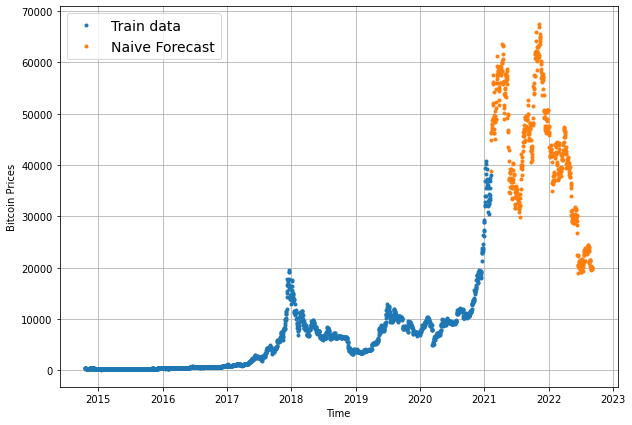

In [103]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data", ylabel="Bitcoin Prices")
# plot_time_series(timesteps=X_test, values=y_test, label="Test data", ylabel="Bitcoin Prices")
plot_time_series(timesteps=X_test[1:], values=y_test[1:], label="Naive Forecast", ylabel="Bitcoin Prices")